In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

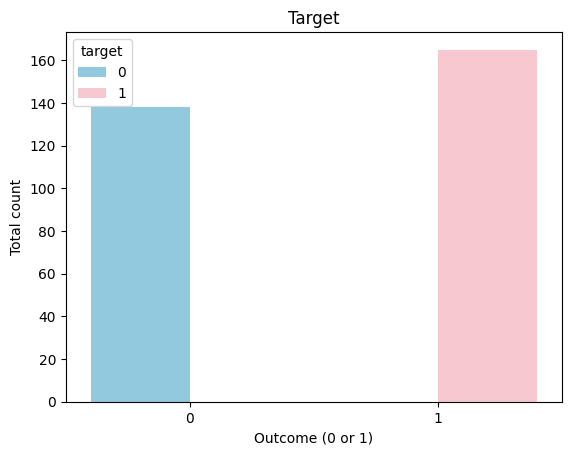

In [21]:
sns.countplot(x='target', data=df, hue='target', palette={0: 'skyblue', 1: 'pink'})
plt.title('Target', fontsize=12)
plt.xlabel('Outcome (0 or 1)', fontsize=10)
plt.ylabel('Total count', fontsize=10)
plt.show()

This can be considered as almost balanced dataset

In [22]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [31]:
def plot_numeric_hist(df):
    """
    Plot histograms for all numeric features in a pandas DataFrame,
    arranged in a 3x3 grid of subplots.

    Parameters:
    df (pandas DataFrame): The input DataFrame containing the data.

    Returns:
    None (displays subplots with histograms using matplotlib/seaborn).
    """

    # Get the list of all column names (features) in the DataFrame
    features = df.select_dtypes(include=['int', 'float']).columns  # Select only numeric features

    # Calculate number of subplots needed (3x3 grid)
    num_features = len(features)
    num_rows = 3
    num_cols = 3
    num_subplots = num_rows * num_cols

    # Create a new figure and subplots with specified size
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

    # Flatten the axes array for easier iteration
    axes = axes.flatten()

    # Iterate over each feature and create a histplot for numeric features
    for i, feature in enumerate(features):
        if i < num_subplots:  # Only plot up to the available subplots
            sns.histplot(df[feature], kde=True, ax=axes[i])  # Create histplot on specified subplot
            axes[i].set_title(f'Histogram of {feature}')  # Set subplot title
            axes[i].set_xlabel(feature)  # Set x-ax


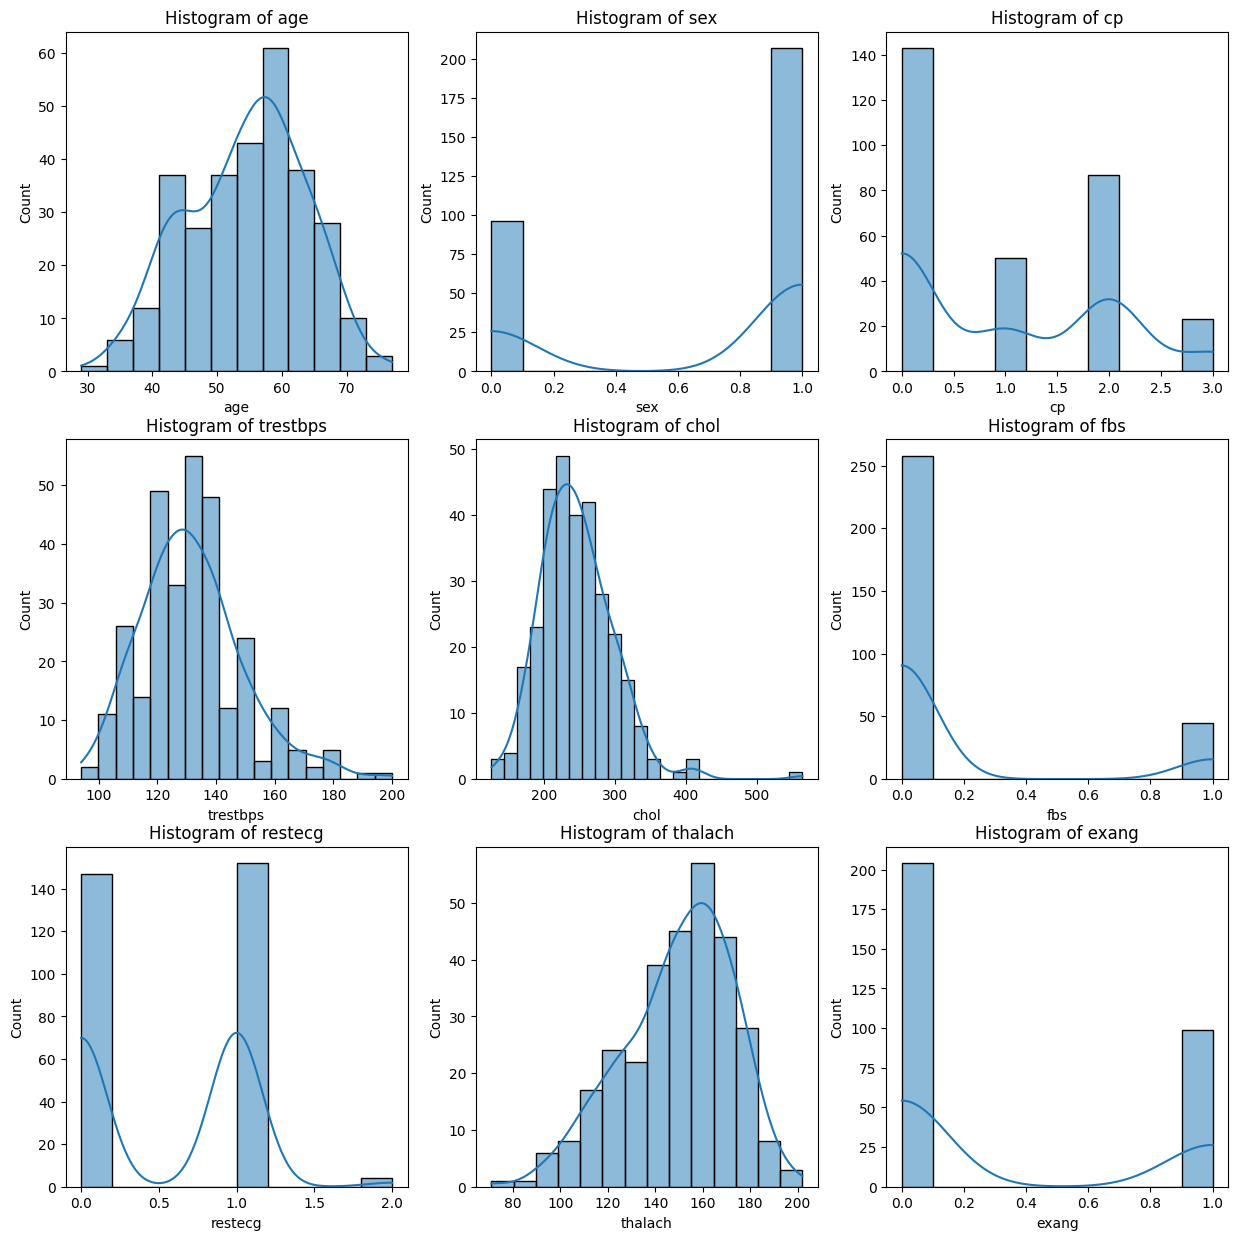

In [32]:
plot_numeric_hist(df)

In [33]:
X = df.iloc[:,:-1]
y = df.iloc[:,1]

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [35]:
#Naive Bayes Gaussianaa

nv_gau = GaussianNB()
nv_gau.fit(X_train, y_train)
y_hat = nv_gau.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_hat)}')

Accuracy: 1.0


In [43]:
svm_clf_rbf = SVC(C=1.0, kernel='linear')
svm_clf_rbf.fit(X_train, y_train)
yhat_svm_rbf = svm_clf_rbf.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, yhat_svm_rbf)}')


Accuracy: 1.0


In [44]:
# importing necessary libraries
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, classification_report

In [47]:
#object
log_model = SGDClassifier()
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_model.fit(X_train_scaled, y_train)
yhat_log = log_model.predict(X_test_scaled)
print(f'Accuracy: {accuracy_score(y_test, yhat_log)}')

Accuracy: 1.0
